In [1]:
import numpy as np

import matplotlib

import qiskit

import qiskit.circuit.library

from qiskit.quantum_info.operators import Operator

from qiskit import *

from qiskit.visualization import plot_histogram

from qiskit.visualization import plot_state_city

### Parameters

In [30]:
nqubits = 6 #N = 2^6 = 64

Iter = 6

omega = 9

### ORACLE and DIFFUSION

In [31]:
#ORACLE

U = np.identity(2**(nqubits))
U[omega,omega] = -1.0
Oracle = Operator(U)


#DIFFUSION

sub_diff = QuantumCircuit(nqubits, name='Diffusion')

for i in range(nqubits):
    sub_diff.h(i)

for i in range(nqubits):
    sub_diff.x(i)

sub_diff.h(nqubits-1)

sub_diff.append(circuit.library.MCXGate(nqubits-1),range(nqubits))

sub_diff.h(nqubits-1)

for i in range(nqubits):
    sub_diff.x(i)

for i in range(nqubits):
    sub_diff.h(i)

# convert the diffuser to a gate
Us = sub_diff.to_instruction()

### Quantum Circuit

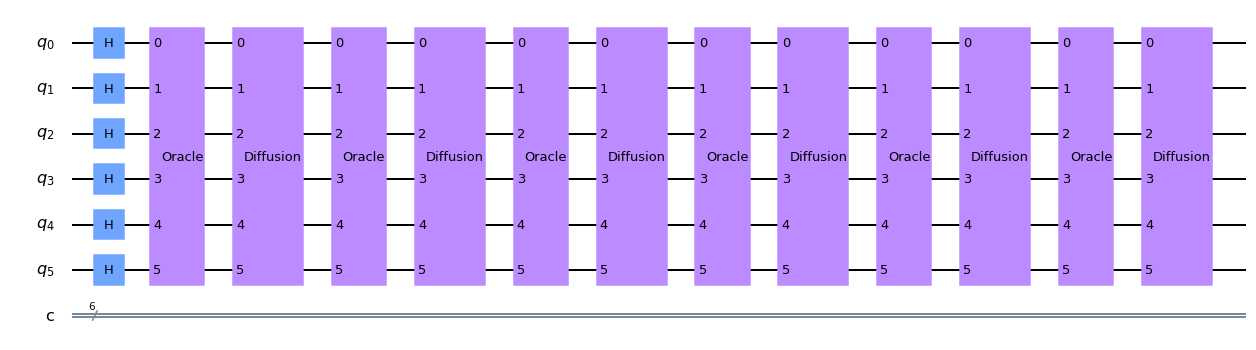

In [32]:
#INITIALIZATION

qr = QuantumRegister(nqubits, 'q')
cr = ClassicalRegister(nqubits, 'c')

grover_circuit = QuantumCircuit(qr, cr)

def init_circuit(qc, qubits):
    for q in range(nqubits):
        qc.h(q)
    return qc

grover_circuit = init_circuit(grover_circuit, nqubits)


#ORACLE and DIFFUSION

for i in range(Iter):
    grover_circuit.unitary(Oracle, range(nqubits), label = 'Oracle')
    grover_circuit.append(Us, range(nqubits))

grover_circuit.draw('mpl')

#### statevector_simulator

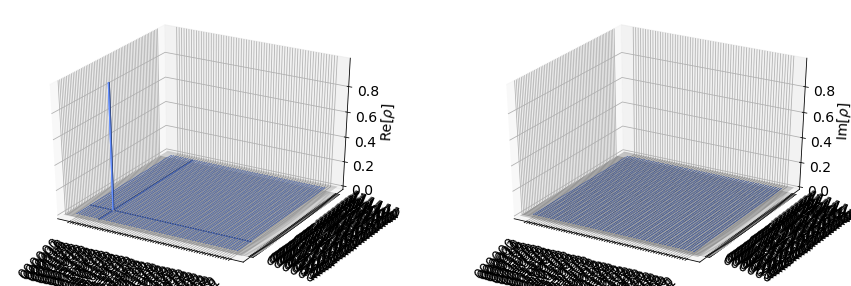

In [33]:
simulator1 = Aer.get_backend('statevector_simulator')

job = execute(grover_circuit, simulator1)

plot_state_city(job.result().get_statevector(grover_circuit))

### Measure

In [34]:
grover_circuit.measure(range(nqubits),range(nqubits));

#### qasm_simulaton

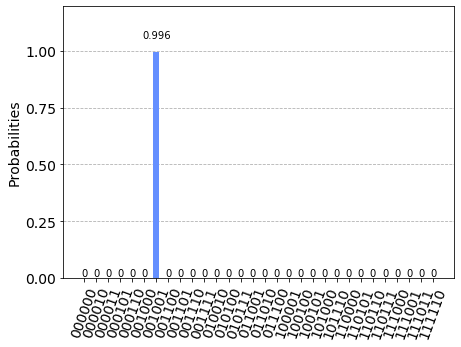

In [35]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(grover_circuit, simulator, shots=10000)

plot_histogram(job.result().get_counts(grover_circuit))